# Bangalore House Price Prediction





#### Objective : 
- To build a price prediction engine for houses in Begaluru, India. 
- Then deploy the model on a website for users to get predictions.



## 1. Import Dependencies

#### Import Libraries

In [1]:
# import neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurations
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 100)
%matplotlib inline
sns.set_style('whitegrid')

#### Import Dataset
- Bangalore House Prices Dataset
- Link to dataset : https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data/data#

In [2]:
# read csv file
df = pd.read_csv("Bengaluru_House_Data.csv")

## 2. Explore Dataset

In [3]:
# display top 5 rows of dataset
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# get dimensions
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  13320
Columns :  9


In [5]:
# meta data - feature dtype and records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
area_type       13320 non-null object
availability    13320 non-null object
location        13319 non-null object
size            13304 non-null object
society         7818 non-null object
total_sqft      13320 non-null object
bath            13247 non-null float64
balcony         12711 non-null float64
price           13320 non-null float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Observations
- features have object and float dtypes
- some missing values present

In [6]:
# meta data - statistical information on dataset
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


Observations
- all float features are distributed on a different scale

## 3. Data Cleaning

- Drop features that are not required to build the model

In [7]:
# drop few features to simplify the model
df.drop(['area_type', 'availability', 'society', 'balcony'], axis=1, inplace=True)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#### Clean null values

In [8]:
# calculate %age of missing values in each feature
null_features = round((df.isnull().sum() / df.shape[0])*100, 2)
null_features.sort_values(ascending=False)


bath          0.55
size          0.12
location      0.01
price         0.00
total_sqft    0.00
dtype: float64

Observations
- Very less number of missing values in the dataset
- `Bath` has the most missing values - 0.55%
- We will drop the missing records

In [9]:
# drop missing records
df.dropna(inplace=True)

In [10]:
# check again for null values

# calculate %age of missing values in each feature
null_features = round((df.isnull().sum() / df.shape[0])*100, 2)
null_features.sort_values(ascending=False)


price         0.0
bath          0.0
total_sqft    0.0
size          0.0
location      0.0
dtype: float64

- All missing records have been removed
- Data has been cleaned

#### Remove inconsistency in data values

Observations
- There are multiple entries for the same value which needs to be normalized
- Some values do not make sense, like 43 BHK

In [11]:
# Feature 'size'
df['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
19 BHK           1
16 BHK           1
12 Bedroom       1
43 Bedroom       1
27 BHK           1
18 Bedroom       1
13 BHK           1
14 BHK           1
Name: size, dtype: int64

#### Clean BHK to convert into numerical feature

In [12]:
# clean feature 'size'
# remove text part and retain only the number of bedrooms

# create a new feature 'bhk'
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))

In [13]:
# display dataset
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df['bhk'].value_counts()

2     5527
3     4832
4     1395
1      649
5      353
6      221
7      100
8       89
9       54
10      14
11       4
27       1
14       1
43       1
18       1
12       1
13       1
16       1
19       1
Name: bhk, dtype: int64

In [15]:
# exploring the 43bhk record - over 20 bedrooms
df[df['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


- 43 BHK house cannot have a total area of 2400 sqft 
- This needs to be cleaned as well

#### Total_sqft

In [16]:
# explore 'total_sqft' feature
df['total_sqft'].value_counts()

1200           843
1100           221
1500           204
2400           195
600            180
              ... 
1140 - 1250      1
4500 - 5540      1
1888             1
2563 - 2733      1
896.9            1
Name: total_sqft, Length: 2067, dtype: int64

#### Observations
- Few entries with range of area, like `1445 - 1455`
- We can take an average of this range

In [17]:
# UDF to detect range of areas in 'total_sqft' feature
def is_float(x):
  try:
    float(x)  # if value can be converted to float then it is numerical only
  except:
    return False  # if it cannot be converted to float then it is not completely numeric
  return True

In [18]:
# display dataset with rows having range of areas
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### Observations:
- range of areas present
- units present with area

Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. Let us drop such corner cases to keep things simple

In [19]:
# UDF to convert range in average value
def convert_area_range_to_average(x):
  tokens = x.split('-')
  if len(tokens) == 2:  # if record is in range
    return (float(tokens[0]) + float(tokens[1]))/2  # then convert into float and take average
  try:
    return float(x)  # convert into float if it is numeric only
  except:
    return None  # take no action neither of the above case - return nothing

In [20]:
df['total_sqft'] = df['total_sqft'].apply(convert_area_range_to_average)
df.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


## 4. Feature Engineering

- Add new feature called price per square feet

In [21]:
# create a price per sqft column
df['price_per_sqft'] = round((df['price']*100000)/df['total_sqft'],2)

In [22]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


#### Let's explore the location feature

In [23]:
# total number of locations
df['location'].nunique()

1304

- there are too many unique locations in the dataset
- this needs to be rectified

Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [24]:
# remove any extra space from the location feature records
df['location'] = df['location'].apply(lambda x : x.strip())

In [25]:
location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [26]:
# how many locations have less than 10 records
len(location_stats[location_stats<=10])

1052

## 5. Dimensionality Reduction
Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [27]:
# call 
location_less_than_10 =  location_stats[location_stats<=10]
location_less_than_10

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [28]:
# transform feature
df['location'] = df['location'].apply(lambda x : 'other' if x in location_less_than_10 else x)
df['location'].nunique()

242

In [29]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


## 6. Outlier Detection and Removal

#### Area / bedrooms ratio

In [30]:
# divide total sqft area with the number of bedrooms
# generally, this value should not be less than 300
df[df['total_sqft']/df['bhk']<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.51
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.33
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.98
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.30
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.00


- A flat with 1020 sqft area with 6 bedrooms is unusual

In [31]:
# calculate the number of such records
len(df[df['total_sqft']/df['bhk']<300])

744

In [32]:
# we will remove all such values
# calculate a dataset without the above outliers
df = df[~(df['total_sqft']/df['bhk']<300)]

In [33]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [34]:
# get dimensions
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  12502
Columns :  7


### Price per sqft

In [35]:
# get stats on 'price_per_sqft' feature
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: price_per_sqft, dtype: float64

- Min - 267
- Max - 176470

Both are extreme cases and should be removed for a more generalized model

In [36]:
# UDF to remove outliers by standard deviation
# filter out anything outside mean and 1 standard deviation since most of the valuable data lies in that range
def remove_pps_outliers(df):  # take DataFrame as input
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):  # group df by location to create a sub dataframe
        m = np.mean(subdf['price_per_sqft'])   # calculate mean
        st = np.std(subdf['price_per_sqft'])   # calculate standard deviation
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-st)) & (subdf['price_per_sqft'] < (m+st))]  # filteration
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out

In [37]:
df = remove_pps_outliers(df)

In [38]:
# get dimensions
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  10241
Columns :  7


- almost 2000 outliers have been removed

### Price vs BHK
- Many records have a higher price for houses with lesser bedrooms than the ones with more bedrooms
- While other features are similar, like location etc
- Let's explore this and rectify as needed

In [39]:
# UDF to compare prices by location for each BHK houses in a scatter plot
def plot_scatter_chart(df, location):
    # create dataframes
    bhk2 = df[(df['location'] == location) & (df['bhk'] == 2)]  # create a DF for location and 2BHK
    bhk3 = df[(df['location'] == location) & (df['bhk'] == 3)]  # create a DF for location and 3BHK
    # scatterplots
    plt.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'], bhk3['price'], color='red', label='3 BHK', s=50, marker='+')
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()

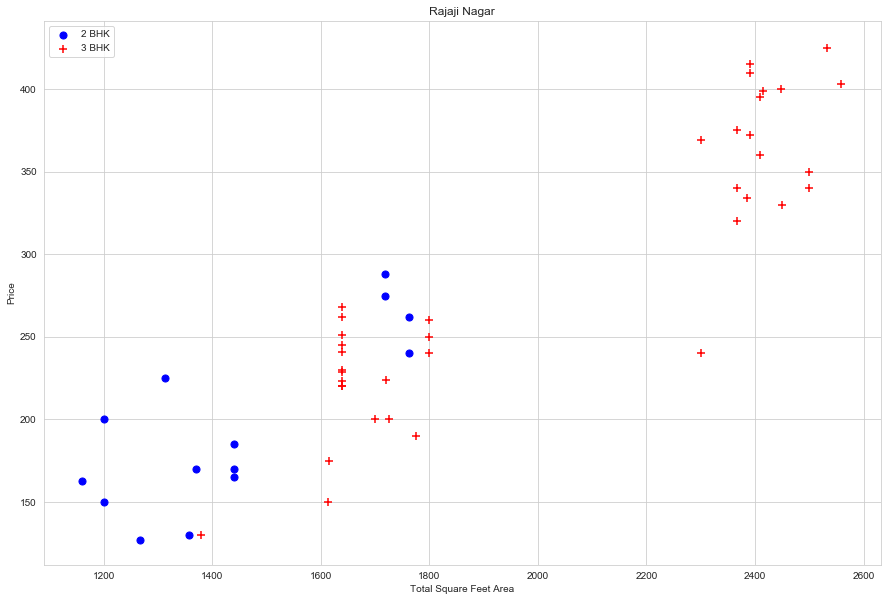

In [40]:
# Rajaji Nagar
plot_scatter_chart(df, 'Rajaji Nagar')

- many 2bhk houses(blue) have a higher price than 3bhk(red) houses around the 1700 total sqt area mark

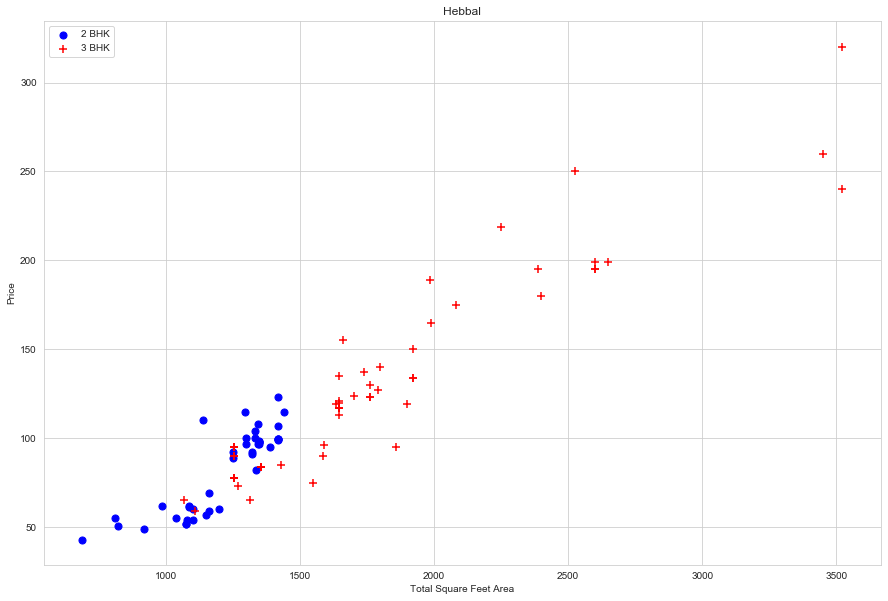

In [41]:
# Hebbal
plot_scatter_chart(df, 'Hebbal')

- many 2bhk houses(blue) have a higher price than 3bhk(red) houses betwen 1000 and 1500 total sqt area mark

In [42]:
# UDF to remove such outliers
# remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std' : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < stats['mean']].index.values)
    return df.drop(exclude_indices, axis='index')

In [43]:
df = remove_bhk_outliers(df)
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [44]:
# get dimensions
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  7329
Columns :  7


- many outliers have been removed

Scatter plots to see improvements

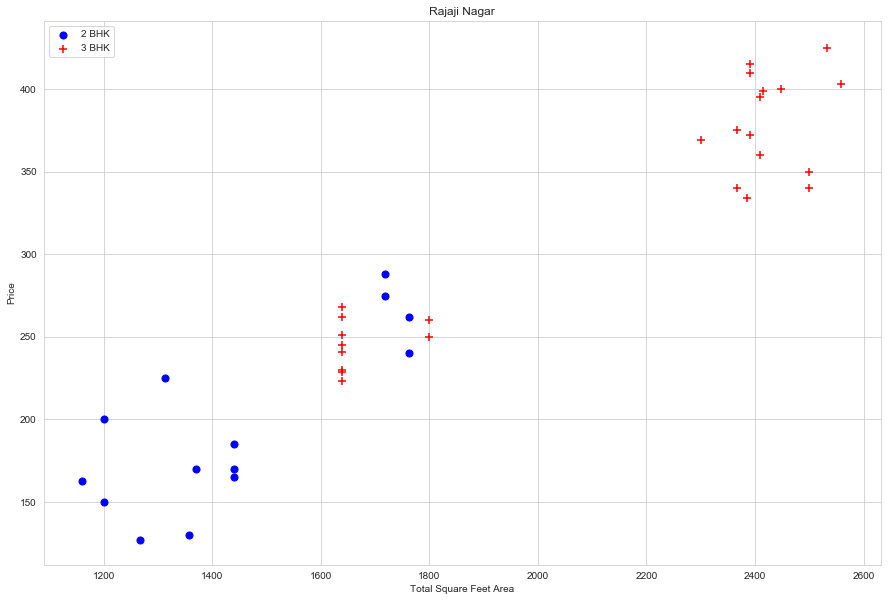

In [45]:
# Rajaji Nagar
plot_scatter_chart(df, 'Rajaji Nagar')

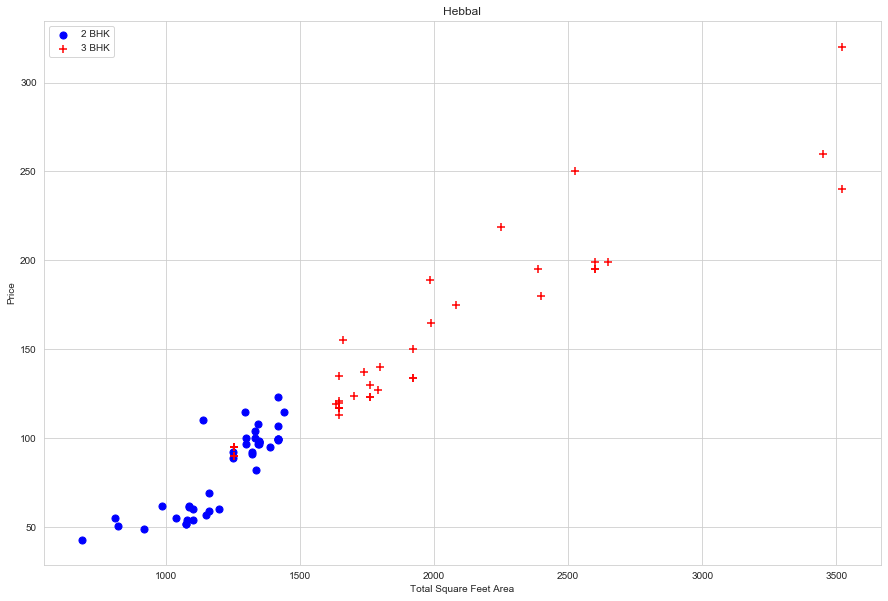

In [46]:
# Hebbal
plot_scatter_chart(df, 'Hebbal')

- Improvements can be observed

Text(0, 0.5, 'Number of properties')

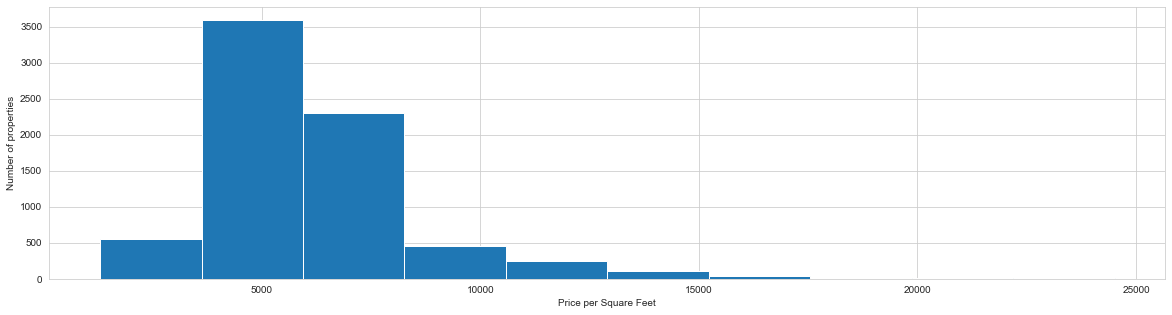

In [47]:
# Histogram to see distribution of properties per_sqft_area
plt.figure(figsize = (20,5))
plt.hist(df['price_per_sqft'])
plt.xlabel("Price per Square Feet")
plt.ylabel('Number of properties')

- most properties in the 5000 price_per_sqft mark
- after 10000 INR, the number of properties keeps on decreasing

### Bathrooms

In [48]:
df['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

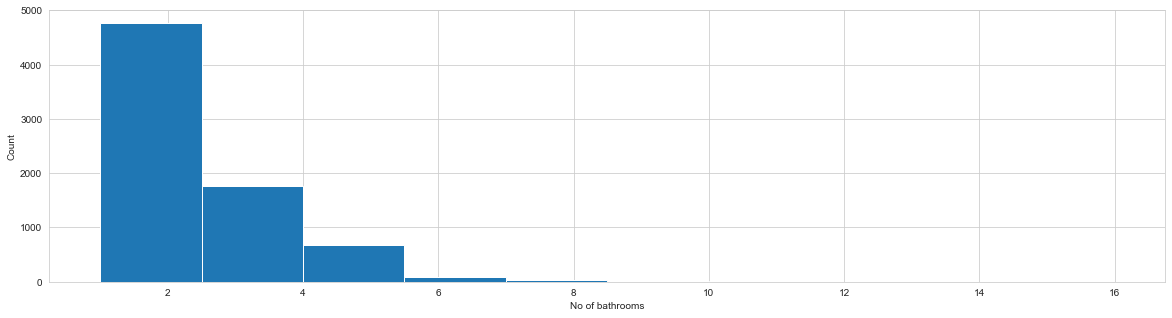

In [49]:
plt.figure(figsize = (20,5))
plt.hist(df['bath'])
plt.xlabel('No of bathrooms')
plt.ylabel('Count')

In [50]:
df['bath'].value_counts()

2.0     4198
3.0     1763
1.0      568
4.0      503
5.0      175
6.0       81
7.0       16
8.0       13
9.0        7
12.0       3
13.0       1
16.0       1
Name: bath, dtype: int64

- we have a few properties with absurdly large number of bathrooms
- let's explore further

In [51]:
df[df['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.00
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.00
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.00
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.00
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.12


- 10 bhk house can have 10 bathrooms and similarly for other bhk houses
- generally if the number of bathrooms is greater than the (number of bedrooms + 2), that is generally an outlier

In [52]:
df[df['bath'] > df['bhk']+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.57
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.90


In [53]:
df[df['bath'] > df['bhk']+2].shape

(4, 7)

- there are 4 such records where there are more bathrooms than bedrooms
- properties with 4 bedroom house with 7 or 8 bathrooms is an outlier
- let us remove them



In [54]:
df = df[df['bath'] < df['bhk']+2]
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


In [55]:
# get dimensions
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  7251
Columns :  7


### Drop unrequired features

In [56]:
df.drop(['size', 'price_per_sqft'], axis=1, inplace=True)
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [57]:
# get dimensions
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  7251
Columns :  5


## 8. Create Dummies

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7251 entries, 0 to 10240
Data columns (total 5 columns):
location      7251 non-null object
total_sqft    7251 non-null float64
bath          7251 non-null float64
price         7251 non-null float64
bhk           7251 non-null int64
dtypes: float64(3), int64(1), object(1)
memory usage: 339.9+ KB


- we have one feature that has object dtype, i.e., the 'location' feature. Let's convert it into numerical with one-hot encoding

In [59]:
dummies = pd.get_dummies(df['location'], drop_first=True)

In [60]:
df = pd.concat([df, dummies], axis=1)
df.head()

,location,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,...,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
# drop 'location' feature
df.drop('location', axis=1, inplace=True)
df.head()

,total_sqft,bath,price,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,...,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
# get dimensions
print("Rows    : ", df.shape[0])
print("Columns : ", df.shape[1])

Rows    :  7251
Columns :  245


### Train-Test Datasets
- Seperate dependent variable from the dataset

In [67]:
X = df.drop('price', axis=1)
X.head(3)

,total_sqft,bath,bhk,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,Amruthahalli,Anandapura,Ananth Nagar,Anekal,Anjanapura,Ardendale,Arekere,Attibele,BEML Layout,BTM 2nd Stage,BTM Layout,Babusapalaya,Badavala Nagar,Balagere,Banashankari,Banashankari Stage II,Banashankari Stage III,Banashankari Stage V,Banashankari Stage VI,Banaswadi,Banjara Layout,Bannerghatta,Bannerghatta Road,Basavangudi,Basaveshwara Nagar,Battarahalli,Begur,Begur Road,Bellandur,Benson Town,Bharathi Nagar,Bhoganhalli,Billekahalli,...,R.T. Nagar,Rachenahalli,Raja Rajeshwari Nagar,Rajaji Nagar,Rajiv Nagar,Ramagondanahalli,Ramamurthy Nagar,Rayasandra,Sahakara Nagar,Sanjay nagar,Sarakki Nagar,Sarjapur,Sarjapur Road,Sarjapura - Attibele Road,Sector 2 HSR Layout,Sector 7 HSR Layout,Seegehalli,Shampura,Shivaji Nagar,Singasandra,Somasundara Palya,Sompura,Sonnenahalli,Subramanyapura,Sultan Palaya,TC Palaya,Talaghattapura,Thanisandra,Thigalarapalya,Thubarahalli,Thyagaraja Nagar,Tindlu,Tumkur Road,Ulsoor,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,2850.0,4.0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [70]:
y = df['price']
y.head(3)

0    428.0
1    194.0
2    235.0
Name: price, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

## 10. Modelling
- Now our dataset is ready for modelling

### Linear regression

In [73]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()   # Create a linear regression object
lr.fit(X_train, y_train)  # train the model on train dataset
lr.score(X_test, y_test)  # evaluate model

0.8452277697872409

- 84% score of model

### K-fold Validation

In [74]:
# 5-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)  # 5-fold cross validation
cross_val_score(LinearRegression(), X, y, cv=cv)  # print all scores

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

- 4 out of 5 scores are over 80%

### Grid Search CV
- We want to try which is the best regression for this dataset
- Therefore, we will run Grid Search CV to test Lasso and DecisionTreeRegressor

In [75]:
# grid search CV for Lasso & DecisionTreeRegressor
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# import regressors
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# UDF to compare different models
def find_best_model(X,y):
    # create a dictionary of models with hyper-parameter tuning
    algos = {
        'Linear Regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },
        'Lasso Regression' : {
            'model' : Lasso(),
            'params' : {
                'alpha' : [1,2],
                'selection' : ['random', 'cyclic']
            }
        },
        'Decision Tree Regression' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best', 'random']
            }
        }
    }
    
    # grid search CV
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    # return best scores in a dataframe
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [76]:
find_best_model(X,y)

,model,best_score,best_params
0,Linear Regression,0.818354,{'normalize': False}
1,Lasso Regression,0.699273,"{'alpha': 1, 'selection': 'cyclic'}"
2,Decision Tree Regression,0.824322,"{'criterion': 'mse', 'splitter': 'random'}"


- Linear and Decision Tree Regression models are performing the best
- we will use the already trained linear regression model which had a 84.5% score

## 11. Predictions

In [107]:
# UDF that takes features as input and predicts price of property
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns == location)[0][0]  # gets the index number of each location
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1  # set that received location index = 1
    
    return print('Estimated price in lacs : INR', np.round(lr.predict([x])[0],2))

In [116]:
# make predictions
predict_price('1st Phase JP Nagar', 1000, 2, 2)

Estimated price in lacs : INR 83.5


In [124]:
# make predictions
predict_price('1st Phase JP Nagar', 4000, 3, 2)

Estimated price in lacs : INR 326.82


In [109]:
# make predictions
predict_price('1st Phase JP Nagar', 1000, 3, 3)

Estimated price in lacs : INR 86.81


In [110]:
# make predictions
predict_price('Indira Nagar', 1000, 3, 3)

Estimated price in lacs : INR 184.58


In [111]:
# make predictions
predict_price('Indira Nagar', 1000, 2, 2)

Estimated price in lacs : INR 181.28


In [112]:
# make predictions
predict_price('Rajaji Nagar', 1000, 2, 2)

Estimated price in lacs : INR 219.14


In [131]:
# make predictions
predict_price('Rajaji Nagar', 1000, 2, 3)

Estimated price in lacs : INR 217.37


- In our dataset, there are many instances where the cost of a 2 bhk is higher than 3 bhk in the same area

## 12. Save Model
- save model in pickle file

In [128]:
# save model as pickle file
import pickle
with open('bangalore_home_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [129]:
# save columns in a JSON file
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))